# Downloading Expression Data from GEO FTP Site:  

### 1- import python modules

In [1]:
%matplotlib inline
import os 
import glob
import matplotlib
import seaborn as sns
import plotly as py
import pandas as pd

### 2- Download the files into the directory of interest and unzip them 

In [2]:
os.chdir('/Users/mustafa.albahrani/workspace/data')

os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70235/suppl/GSE70235_Bulk.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70236/suppl/GSE70236_Cmp.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70238/suppl/GSE70238_GG1.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70239/suppl/GSE70239_Gfi1.Null.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70240/suppl/GSE70240_Gmp.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70241/suppl/GSE70241_IG2.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70242/suppl/GSE70242_Irf8.Null.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70243/suppl/GSE70243_LK.CD34+.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE70nnn/GSE70244/suppl/GSE70244_Lsk.txt.gz')
os.system('wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE78nnn/GSE78907/suppl/GSE78907_Gfi1.Null.Irf8.Null.txt.gz')

os.system('gzip -d *.txt.gz')

0

In [2]:
df_bulk = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70235_Bulk.txt', sep='\t')
df_cmp = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70236_Cmp.txt', sep='\t')
df_gg1 = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70238_GG1.txt', sep='\t')
df_gfi1_null = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70239_Gfi1.Null.txt', sep='\t')
df_gmp = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70240_Gmp.txt', sep='\t')
df_ig2 = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70241_IG2.txt', sep='\t')
df_irf8_null = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70242_Irf8.Null.txt', sep='\t')
df_lk = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70243_LK.CD34+.txt', sep='\t')
df_lsk = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE70244_Lsk.txt', sep='\t')
df_gfi1_irf8_nulls = pd.read_csv('/Users/mustafa.albahrani/workspace/data/GSE78907_Gfi1.Null.Irf8.Null.txt', sep='\t')

In [3]:
def mainpulate(data_frame):
    data_frame.columns.values[0] = 'uid'
    data_frame = data_frame.set_index('uid')
    data_frame = data_frame.loc[data_frame.index.isin(['Foxm1','Rhno1'])]
    data_frame = data_frame.T
    print(data_frame)

    return data_frame

In [4]:
def set_variables(data_frame):
    x,y = data_frame['Foxm1'], data_frame['Rhno1']
    return x,y

In [4]:
df_bulk = mainpulate(df_bulk)
df_cmp = mainpulate(df_cmp)
df_gg1 = mainpulate(df_gg1)
df_gfi1_null = mainpulate(df_gfi1_null)
df_gmp = mainpulate(df_gmp)
df_ig2 = mainpulate(df_ig2)
df_irf8_null = mainpulate(df_irf8_null)
df_lk = mainpulate(df_lk)
df_lsk = mainpulate(df_lsk)
df_gfi1_irf8_nulls = mainpulate(df_gfi1_irf8_nulls)

uid           Foxm1     Rhno1
11RosaH    5.295356  4.618239
12RosaH    5.413797  4.848498
14RosaF    5.392317  4.586765
16RosaF    5.454176  5.095924
17Rosa-    5.853247  4.316146
18Rosa-    5.810443  5.121015
8RosaH     5.423914  4.771357
9RosaH     5.148527  4.982765
CAG-14914  6.089583  4.405992
CAG-14915  5.609105  5.068671
CMP        5.471838  5.511278
GMP        5.665052  5.610287
Gfi1.Null  4.945327  5.305971
Irf8.Null  4.851499  5.696828
LSK        5.555816  5.837943
uid        Foxm1      Rhno1
Cmp.1   0.000000   5.250962
Cmp.2   0.000000   0.000000
Cmp.3   0.400538   0.985500
Cmp.4   0.000000   0.000000
Cmp.5   2.077243   8.467116
Cmp.6   0.485427   8.670267
Cmp.7   0.739848   7.841470
Cmp.8   0.000000   0.000000
Cmp.9   1.691534   8.061128
Cmp.10  0.000000   0.839960
Cmp.11  0.000000   0.925999
Cmp.12  0.000000   9.093998
Cmp.13  4.489928   0.000000
Cmp.14  0.000000   8.164304
Cmp.15  0.000000   2.361768
Cmp.16  0.250962   0.000000
Cmp.17  5.950235   7.862885
Cmp.18  0.000000

In [5]:
df_bulk = set_variables(mainpulate(df_bulk))
df_cmp = set_variables(mainpulate(df_cmp))
df_gg1 = set_variables(mainpulate(df_gg1))
df_gfi1_null = set_variables(mainpulate(df_gfi1_null))
df_gmp = set_variables(mainpulate(df_gmp))
df_ig2 = set_variables(mainpulate(df_ig2))
df_irf8_null = set_variables(mainpulate(df_irf8_null))
df_lk = set_variables(mainpulate(df_lk))
df_lsk = set_variables(mainpulate(df_lsk))
df_gfi1_irf8_nulls = set_variables(mainpulate(df_gfi1_irf8_nulls))

NameError: name 'set_variables' is not defined

In [39]:
df_bulk = df_bulk.T
df_cmp = df_cmp.T
df_gg1 = df_gg1.T
df_gfi1_null = df_gfi1_null.T
df_gmp = df_gmp.T
df_ig2 = df_ig2.T
df_irf8_null = df_irf8_null.T
df_lk = df_lk.T
df_lsk = df_lsk.T
df_gfi1_irf8_nulls = df_gfi1_irf8_nulls.T

In [43]:
df_all = df_bulk.join(df_cmp).join(df_gg1).join(df_gfi1_null).join(df_gmp).join(df_ig2).join(df_irf8_null).join(df_lk).join(df_lsk).join(df_gfi1_irf8_nulls)

In [51]:
df_all = df_all.T
df_all

,11RosaH,12RosaH,14RosaF,16RosaF,17Rosa-,18Rosa-,8RosaH,9RosaH,CAG-14914,CAG-14915,...,Gfi1--Irf8--.B7,Gfi1--Irf8--.C7,Gfi1--Irf8--.D7,Gfi1--Irf8--.E7,Gfi1--Irf8--.F7,Gfi1--Irf8--.G7,Gfi1--Irf8--.H7,Gfi1--Irf8--.A8,Gfi1--Irf8--.C8,Gfi1--Irf8--.E8
uid,,,,,,,,,,,,,,,,,,,,,
Foxm1,5.295356,5.413797,5.392317,5.454176,5.853247,5.810443,5.423914,5.148527,6.089583,5.609105,...,0.0,6.812627,0.0,2.017922,0.389567,0.0,1.244887,0.000000,0.000000,0.000000
Rhno1,4.618239,4.848498,4.586765,5.095924,4.316146,5.121015,4.771357,4.982765,4.405992,5.068671,...,0.0,9.080551,0.0,6.970854,8.205207,0.0,8.063988,1.049631,9.754904,8.966477


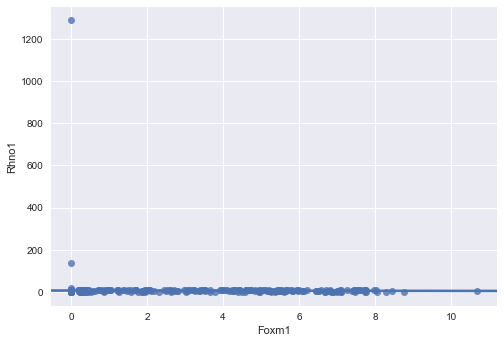

In [50]:
sns.regplot(x=df_all['Foxm1'], y=df_all['Rhno1'])

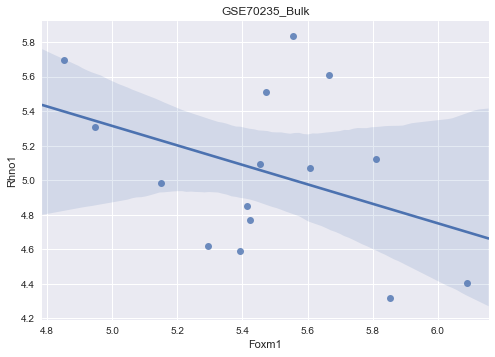

In [6]:
sns.regplot(x=df_bulk['Foxm1'], y=df_bulk['Rhno1']).set_title('GSE70235_Bulk')

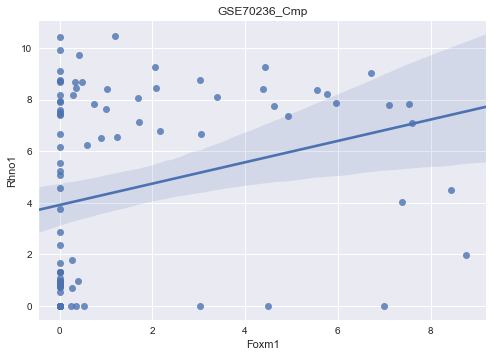

In [7]:
sns.regplot(x=df_cmp['Foxm1'], y=df_cmp['Rhno1']).set_title('GSE70236_Cmp')

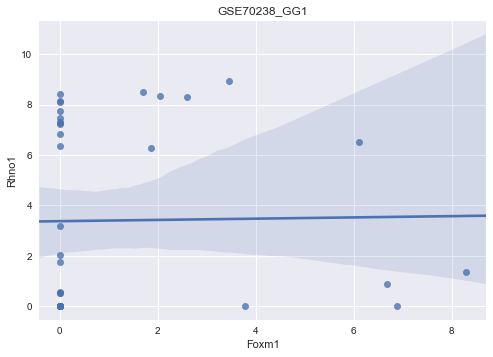

In [8]:
sns.regplot(x=df_gg1['Foxm1'], y=df_gg1['Rhno1']).set_title('GSE70238_GG1')

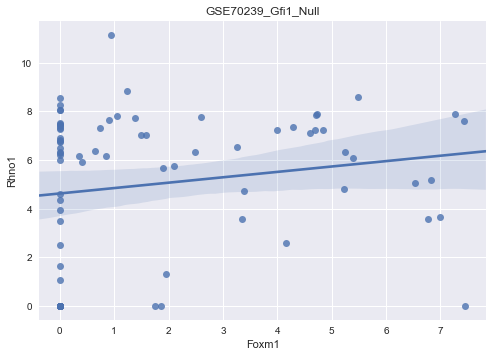

In [9]:
sns.regplot(x=df_gfi1_null['Foxm1'], y=df_gfi1_null['Rhno1']).set_title('GSE70239_Gfi1_Null')

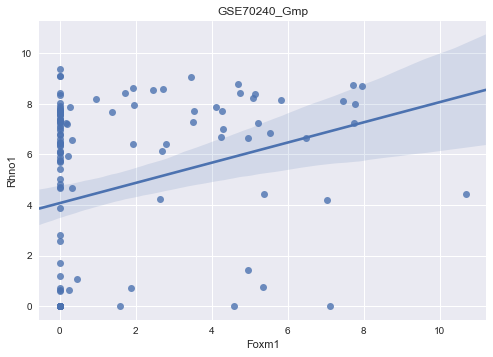

In [10]:
sns.regplot(x=df_gmp['Foxm1'], y=df_gmp['Rhno1']).set_title('GSE70240_Gmp')

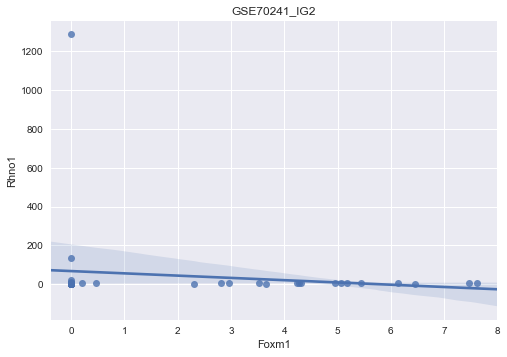

In [11]:
sns.regplot(x=df_ig2['Foxm1'], y=df_ig2['Rhno1']).set_title('GSE70241_IG2')

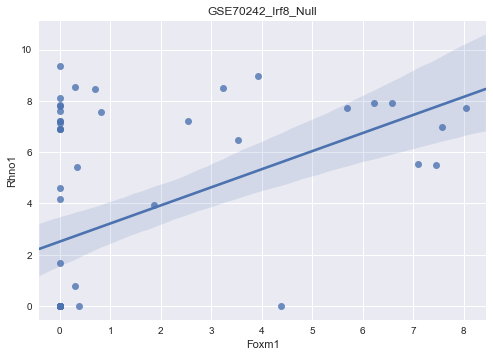

In [12]:
sns.regplot(x=df_irf8_null['Foxm1'], y=df_irf8_null['Rhno1']).set_title('GSE70242_Irf8_Null')

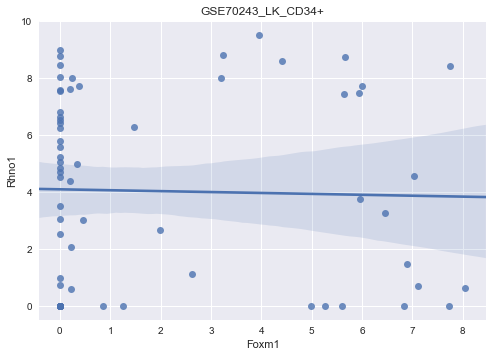

In [13]:
sns.regplot(x=df_lk['Foxm1'], y=df_lk['Rhno1']).set_title('GSE70243_LK_CD34+')

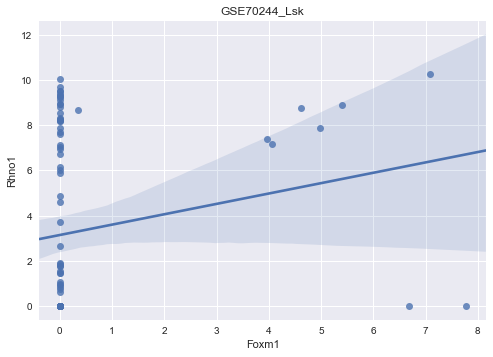

In [14]:
sns.regplot(x=df_lsk['Foxm1'], y=df_lsk['Rhno1']).set_title('GSE70244_Lsk')

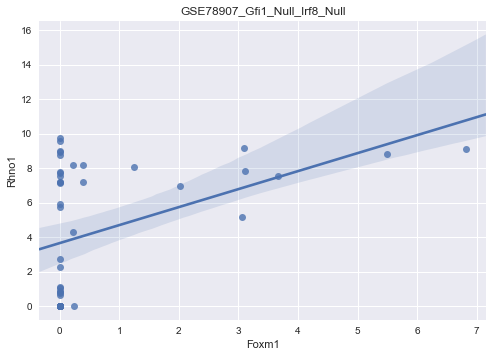

In [15]:
sns.regplot(x=df_gfi1_irf8_nulls['Foxm1'], y=df_gfi1_irf8_nulls['Rhno1']).set_title('GSE78907_Gfi1_Null_Irf8_Null')

In [12]:
x,y = df_bulk['Foxm1'], df_bulk['Rhno1']

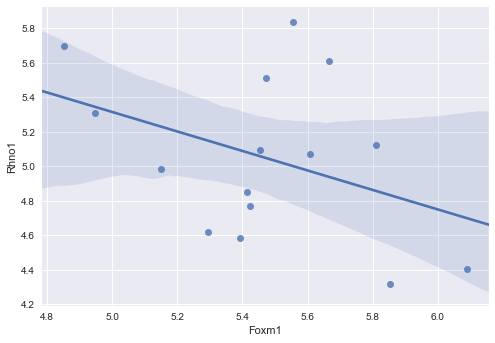

In [13]:
sns.regplot(x=x, y=y)